# Stability Analysis

From the moment we let our models go, we want the flight to be "stable". But what does that even mean?

A stable condition is one where all the forces acting on the model tend to keep it flying along its current path when a disturbance of some kind hits the model. Disturbances come in many forms: an updraft caused by a hot spot on the floor, a downdraft through an unclosed ceiling vent, or a collision with something. We will not worry about that last one, since all bets are off as to what the model will do! The other disturbances act to change the location, magnitude, and direction of the forces acting on the model. Obviously, we need to look at those forces before we go further. 

## Aerodynamic Forces

There are four primary forces acting on a model: weight, lift, thrust, and drag. Under normal conditions, lift exactly offsets weight, and thrust offsets drag. However, it is not that simple. The location of those forces also enters into our analysis. 
    
Here is a simplified diagram showing how many variables we have when we consider just straight and level flight:   

In [6]:
%reload_ext tikzmagic

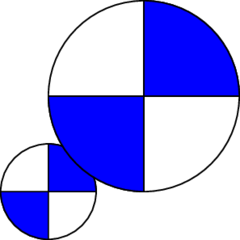

In [148]:
%%tikz -l calc

\newcommand{\CG}[3] {% x,y,radius
  \draw (#1,#2) circle (#3);
  \filldraw[fill=blue] (#1,#2) -- ++(#3,0) arc (0:90:#3) -- cycle;
  \filldraw[fill=blue] (#1,#2) -- ++(-#3,0) arc(180:270:#3) -- cycle;
}
      
\CG{0}{0}{0.5};
\CG{1}{1}{1};

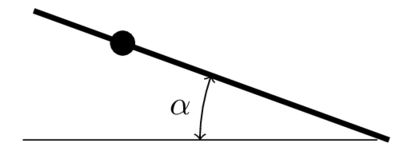

In [197]:
%%tikz

\newcommand{\wing}[4]{% x,y,angle span
  \path (#1,#2) node(o){} -- ++(#4,0) node(te){} -- ++(180-#3:#4)node(le){};
  \draw[thin](o) -- (te);
  \draw[ultra thick](#4,0) -- ++(180-#3:#4);
  \draw[thin,<->] (2,0)  arc (180:180-#3:0.5*#4) node[left,midway]{$\alpha$};
  \filldraw[black] (te)++(180-#3:0.75*#4) circle(0.125);
}
\wing{0}{0}{20}{4};

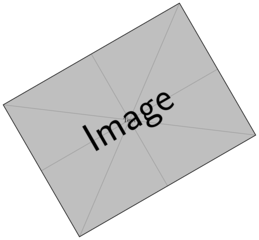

In [198]:
%%tikz
\begin{scope} [rotate=30]
    \node [transform shape](scope6) at (0,0) {\includegraphics{example-image}}; 
    \node at (0,0) [rotate=0,color=black] {Text};
\end{scope}

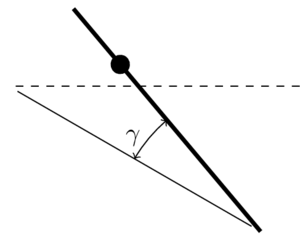

In [205]:
%%tikz

\newcommand{\wing}[4]{% x,y,angle span
  \begin{scope} [rotate=-30]
    \path (#1,#2) node(o){} -- ++(#4,0) node(te){} -- ++(180-#3:#4)node(le){};
    \draw[thin](o) -- (te);
    \draw[ultra thick](#4,0) -- ++(180-#3:#4);
    \draw[thin,<->] (2,0)  arc (180:180-#3:0.5*#4) node[left,midway]{$\gamma$};
    \filldraw[black] (te)++(180-#3:0.75*#4) circle(0.125);
  \end{scope}
}
\draw[dashed] (4,0) -- (0,0);
\wing{0}{0}{20}{4};

In [142]:
%%tikz -l calc

\newcommand{\radius}{0.125}

\newcommand{\CG}[2] {%
  \draw (#1,#2) circle (\radius);
  \filldraw[fill=blue] (#1,#2) -- ++(\radius,0) arc (0:90:\radius) -- cycle;
\filldraw[fill=blue] (#1,#2) -- ++(-\radius,0) arc(180:270:\radius) -- cycle;
}

\newcommand{\wing}[4]{% x,y,size,angle
  \draw (#1, #2) -- ++(-#3,0);
  \draw (#1, #2) -- ++(#3,0);
    \draw (#1, #3) -- ++(180-#4,3);
}

\newcommand{\axes}[2]{
  \draw (#1, #2} -- ++(5,0);
  \draw (#1, #2) -- ++ (0,4);
} 
      
\axes{-2}{0};
\wing{0}{0}{2}{15};
        
% draw axes
%\draw[ultra thin] (-2,0) -- ++(0,4) node [above]{y};
% draw body ---------------------------------------------------------
%\draw[thin] (-2,0) -- (2,0) -- (2,0.125) -- (-2,0.125) -- cycle;
% draw tailboom
%\draw[thin] (2,0.0625) -- (6,0.09375) -- (6,0.125) -- (2,0.125) -- cycle;
% draw thrust line
%\draw (-2,0) -- ++(0,6);
%\draw[ultra thin, ->] (6.25,0) -- ++(1,0) node[right]{x};
%%\draw (-1.75,0) -- (-1.75,-0.5);
%\draw[dashed] (-3.,-0.25) -- (0,-0.25);
%\draw[ultra thin](-1.75,-0.25) -- ++(15:4);
%\draw [thick,->] (-1.75,-0.25) -- ++(195:1.25) node[left]{$T$};
%\CG{1.5}{1.5};
%% draw wing weight force
%\draw[thick,->] (1.5,1.45) -- ++(270:2) node[below]{$W_t$};
%% draw wing -------------------------------------------------------------
%\draw[ultra thin](-1.5,2.875) rectangle (2,3.175);
%% draw AC
%\draw[fill=black] (-0.75,3) circle(\radius) node [label={[shift={(0,-0.75)}]AC}]{};
%% draw wing lift vector
%\draw[ultra thick,->] (-0.75,3.25) -- ++(0,2) node[above]{$L_w$};
% draw wing drag vector
\draw[ultra thick,->] (-0.5,3) -- ++(1.5,0) node[right] {$D_w$};
% draw stab ------------------------------------------------------------------

%\draw[ultra thin](4,-0.875) rectangle (6,-1.175);
% draw AC
%\draw[fill=black] (4.75,-1) circle(\radius) node [label={[shift={(0,-0.75)}]AC}]{};
% draw stab lift vector
%\draw[ultra thick,->] (4.75,-1.25) -- ++(0,2) node[above]{$L_s$};
% draw stab drag vector
%\draw[ultra thick,->] (4.5,-1) -- ++(1.5,0) node[right] {$D_s$};

pdflatex terminated with signal 1
command:
    pdflatex --shell-escape tikz.tex
tkiz.tex:

    \documentclass[convert={convertexe={convert},density=300,size=400x240,outext=.png},border=0pt]{standalone}
    \usepackage[]{tikz}
    \usetikzlibrary{calc}

    \begin{document}
    \begin{tikzpicture}[scale=1,]
    \newcommand{\radius}{-0.125}

    \newcommand{\CG}[2] {%
      \draw (#1,#2) circle (\radius);
      \filldraw[fill=blue] (#1,#2) -- ++(\radius,0) arc (0:90:\radius) -- cycle;
    \filldraw[fill=blue] (#1,#2) -- ++(-\radius,0) arc(180:270:\radius) -- cycle;
    }

    \newcommand{\wing}[4]{% x,y,size,angle
      \draw (#1, #2) -- ++(-#3,0);
      \draw (#1, #2) -- ++(#3,0);
        \draw (#1, #3) -- ++(180-#4,3);
    }

    \newcommand{\axes}[2]{
      \draw (#1, #2} -- ++(5,0);
      \draw (#1, #2) -- ++ (0,4);
    } 
      
    \axes{-2}{0};
    \wing{0}{0}{2}{15};
        
    % draw axes
    %\draw[ultra thin] (-2,0) -- ++(0,4) node [above]{y};
    % draw body ---------------

### Weight

### Lift

### Thrust

### Drag